In [12]:
import boto3
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
s3 = boto3.client("s3")

In [5]:
img_df = pd.read_csv("s3://dogfaces/reviews/pictures_log.csv")
img_df.shape

(2619, 7)

In [9]:
test_link = img_df['pic_url'][1]
print test_link

http://chewy.ugc.bazaarvoice.com/0090-en_us/2133861/photo.jpg


In [11]:
img_data = requests.get(test_link).content

In [17]:
with open('photo.jpg', 'wb') as f:
    f.write(img_data)

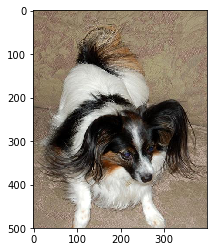

In [27]:
plt.imshow(plt.imread('n02086910_399.jpg'))

In [24]:
s3.put_object(Bucket="dogfaces",Key='test.jpg', Body=img_data)

{u'ETag': '"51baae01208ff65bd05e2036294b6f11"',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '0',
   'date': 'Thu, 07 Sep 2017 20:57:42 GMT',
   'etag': '"51baae01208ff65bd05e2036294b6f11"',
   'server': 'AmazonS3',
   'x-amz-id-2': 'OMM+gQCCoJ0TUl9odEalFcYPqm3wxhp7c8+OkrvSGcz++KUx8bW4LlShOaAISZoy3wzxct2eeSU=',
   'x-amz-request-id': 'D2585C65FC4D2345'},
  'HTTPStatusCode': 200,
  'HostId': 'OMM+gQCCoJ0TUl9odEalFcYPqm3wxhp7c8+OkrvSGcz++KUx8bW4LlShOaAISZoy3wzxct2eeSU=',
  'RequestId': 'D2585C65FC4D2345',
  'RetryAttempts': 0}}

In [ ]:
def download_review_pics(df):
    N = df.shape[0]
    for i in xrange(N):
        if i%100 == 1:
            print "processed till {} images".format(i+1)
        pic_url = df.iloc[i]['pic_url']
        pic_name = df.iloc[i]['pic_name']
        r = requests.get(test_link)
        if r.status_code == 200:
            img_data = r.content
            image_name = "reviews/review_pics/"+pic_name
            s3.put_object(Bucket="dogfaces", Key=image_name, Body=img_data);
        else:
            print "images {} could not download".format(pic_name)

In [28]:
img_df.head()

,pic_id,pic_name,pic_url,review_id,star_rating,toy_id,toy_name
0,0090-en_us_2220532,0090-en_us_2220532_photo.jpg,http://chewy.ugc.bazaarvoice.com/0090-en_us/22...,184827089,5,108574,mammoth-cottonblend-5-knot-dog-rope
1,0090-en_us_2133861,0090-en_us_2133861_photo.jpg,http://chewy.ugc.bazaarvoice.com/0090-en_us/21...,184367022,5,108574,mammoth-cottonblend-5-knot-dog-rope
2,0090-en_us_1993453,0090-en_us_1993453_photo.jpg,http://chewy.ugc.bazaarvoice.com/0090-en_us/19...,183986220,5,108574,mammoth-cottonblend-5-knot-dog-rope
3,0090-en_us_1648157,0090-en_us_1648157_photo.jpg,http://chewy.ugc.bazaarvoice.com/0090-en_us/16...,182953834,5,108574,mammoth-cottonblend-5-knot-dog-rope
4,0090-en_us_1428931,0090-en_us_1428931_photo.jpg,http://chewy.ugc.bazaarvoice.com/0090-en_us/14...,181986183,5,108574,mammoth-cottonblend-5-knot-dog-rope
